##### audio from inverse FFT
[link](https://stackoverflow.com/questions/56931834/creating-wave-data-from-fft-data/57323359#57323359)

In [6]:
import numpy as np
import librosa
import librosa.display
import soundfile

from IPython.display import Audio

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 72

In [7]:
# sr = 44100
# load audio 
path = '../static/audio/test3.mp3'
y, sr = librosa.load(path) #, sr=sr)

/home/desk/.cache/pypoetry/virtualenvs/audio-gen-C_bZeBjK-py3.8/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [10]:
# parameters
n_mels = 128
# beats_per_minute = 120
# samples_per_beat = abs(sr / (beats_per_minute * 60))
# hop_length = int(samples_per_beat * 256)
hop_length = 512
# n_iter = 128
n_iter = 32
n_mfcc = None # can try n_mfcc=20

# create Mel-spectrogram
S = np.abs(librosa.stft(y, hop_length=hop_length, n_fft=hop_length*2))
mel_spec = librosa.feature.melspectrogram(S=S, sr=sr, n_mels=n_mels, hop_length=hop_length)

# optional, compute MFCCs in addition
if n_mfcc is not None:
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), sr=sr, n_mfcc=n_mfcc)
    mel_spec = librosa.feature.inverse.mfcc_to_mel(mfcc, n_mels=n_mels)

#### inverse

In [11]:
# Inverse mel-spectrogram
S_inv = librosa.feature.inverse.mel_to_stft(mel_spec, sr=sr, n_fft=hop_length*4)
y_inv = librosa.griffinlim(S_inv, n_iter=n_iter,
                            hop_length=hop_length)

# preview
Audio(y_inv, rate=sr, autoplay=False)

In [12]:
# Invert to audio directly?? (sounds the same as mel_to_stft>griffinlim)
S_inv = librosa.feature.inverse.mel_to_audio(mel_spec)
Audio(S_inv, rate=sr, autoplay=False)

In [101]:
# invert sft without mel!
y_inv = librosa.griffinlim(S, n_iter=n_iter,
                           hop_length=hop_length)
Audio(y_inv, rate=sr, autoplay=True)

In [14]:
# original audio
Audio(y, rate=sr, autoplay=False)

In [77]:
# write out
# soundfile.available_formats()
# soundfile.available_subtypes
# soundfile.write('orig.wav', y, samplerate=sr)
# soundfile.write('inv.wav', y_inv, samplerate=sr)

#### Mel Spectrogram

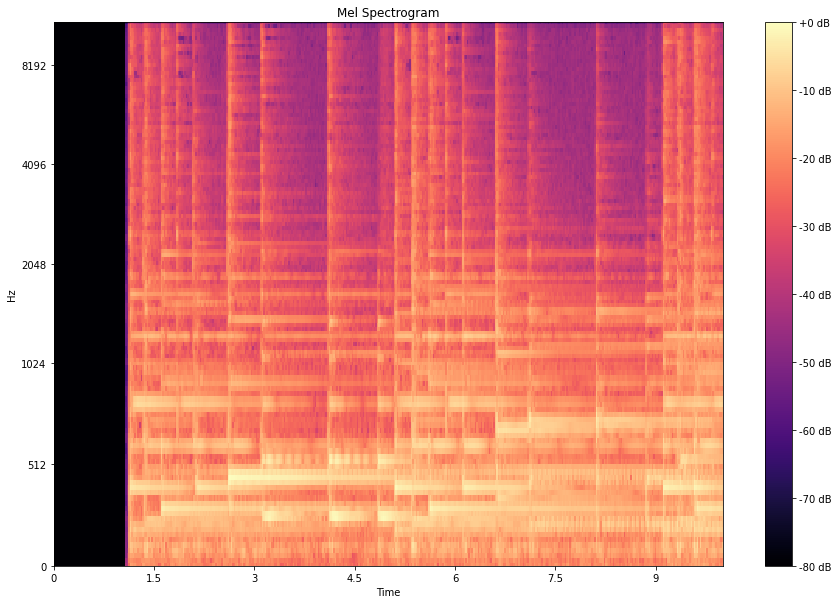

In [15]:
# scale amplitude up
scaled_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

librosa.display.specshow(scaled_mel_spec, y_axis='mel', fmax=sr/2, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

#### Log Spectrogram

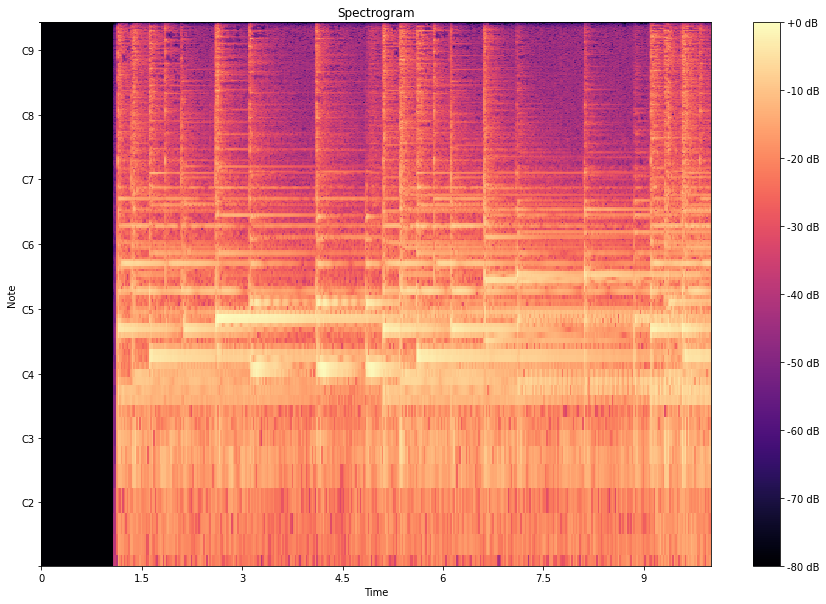

In [16]:
# scale amplitude up
scaled_spec = librosa.power_to_db(S, ref=np.max)

librosa.display.specshow(scaled_spec, y_axis='fft_note', x_axis='time');
plt.title('Spectrogram');
plt.colorbar(format='%+2.0f dB');

#### docs

[librosa!](https://librosa.org/doc/main/)

In [24]:
?librosa.griffinlim

Signature:
librosa.griffinlim(
    S,
    n_iter=32,
    hop_length=None,
    win_length=None,
    window='hann',
    center=True,
    dtype=None,
    length=None,
    pad_mode='reflect',
    momentum=0.99,
    init='random',
    random_state=None,
)
Docstring:
Approximate magnitude spectrogram inversion using the "fast" Griffin-Lim algorithm.

Given a short-time Fourier transform magnitude matrix (``S``), the algorithm randomly
initializes phase estimates, and then alternates forward- and inverse-STFT
operations. [#]_

Note that this assumes reconstruction of a real-valued time-domain signal, and
that ``S`` contains only the non-negative frequencies (as computed by
`stft`).

The "fast" GL method [#]_ uses a momentum parameter to accelerate convergence.

.. [#] D. W. Griffin and J. S. Lim,
    "Signal estimation from modified short-time Fourier transform,"
    IEEE Trans. ASSP, vol.32, no.2, pp.236–243, Apr. 1984.

.. [#] Perraudin, N., Balazs, P., & Søndergaard, P. L.
    "A fast Grif

In [122]:
?librosa.display.specshow

Signature:
librosa.display.specshow(
    data,
    x_coords=None,
    y_coords=None,
    x_axis=None,
    y_axis=None,
    sr=22050,
    hop_length=512,
    fmin=None,
    fmax=None,
    tuning=0.0,
    bins_per_octave=12,
    key='C:maj',
    Sa=None,
    mela=None,
    thaat=None,
    auto_aspect=True,
    htk=False,
    ax=None,
    **kwargs,
)
Docstring:
Display a spectrogram/chromagram/cqt/etc.

For a detailed overview of this function, see :ref:`sphx_glr_auto_examples_plot_display.py`

Parameters
----------
data : np.ndarray [shape=(d, n)]
    Matrix to display (e.g., spectrogram)

sr : number > 0 [scalar]
    Sample rate used to determine time scale in x-axis.

hop_length : int > 0 [scalar]
    Hop length, also used to determine time scale in x-axis

x_axis, y_axis : None or str
    Range for the x- and y-axes.

    Valid types are:

    - None, 'none', or 'off' : no axis decoration is displayed.

    Frequency types:

    - 'linear', 'fft', 'hz' : frequency range is determined 

In [20]:
?librosa.feature.spectral.chroma_stft

Signature:
librosa.feature.spectral.chroma_stft(
    y=None,
    sr=22050,
    S=None,
    norm=inf,
    n_fft=2048,
    hop_length=512,
    win_length=None,
    window='hann',
    center=True,
    pad_mode='reflect',
    tuning=None,
    n_chroma=12,
    **kwargs,
)
Docstring:
Compute a chromagram from a waveform or power spectrogram.

This implementation is derived from ``chromagram_E`` [#]_

.. [#] Ellis, Daniel P.W.  "Chroma feature analysis and synthesis"
       2007/04/21
       http://labrosa.ee.columbia.edu/matlab/chroma-ansyn/

Parameters
----------
y : np.ndarray [shape=(n,)] or None
    audio time series

sr : number > 0 [scalar]
    sampling rate of ``y``

S : np.ndarray [shape=(d, t)] or None
    power spectrogram

norm : float or None
    Column-wise normalization.
    See `librosa.util.normalize` for details.

    If `None`, no normalization is performed.

n_fft : int  > 0 [scalar]
    FFT window size if provided ``y, sr`` instead of ``S``

hop_length : int > 0 [scalar]
